In [1]:
# =============================================
# Module 3 - Probability, Statistics & Risk
# Project 2: Risk Metrics & Value-at-Risk (VaR)
# =============================================

# Author: Rein | Pixel Sky Solutions
# Course: Python–Finance Master Plan
# ---------------------------------------------
# In this notebook we estimate financial risk
# using different Value-at-Risk (VaR) methods.
# ---------------------------------------------

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [4]:
# 🎯 Step 1: Generate Synthetic Daily Returns
# --------------------------------------------
# We'll simulate 1000 days of returns with mean ~0.05% (≈12% annual)
# and volatility ~2% daily (≈32% annual)
np.random.seed(42)
n_days = 1000
mu = 0.0005
sigma = 0.02

returns = np.random.normal(mu, sigma, n_days)
returns = pd.Series(returns, name="Daily Return")

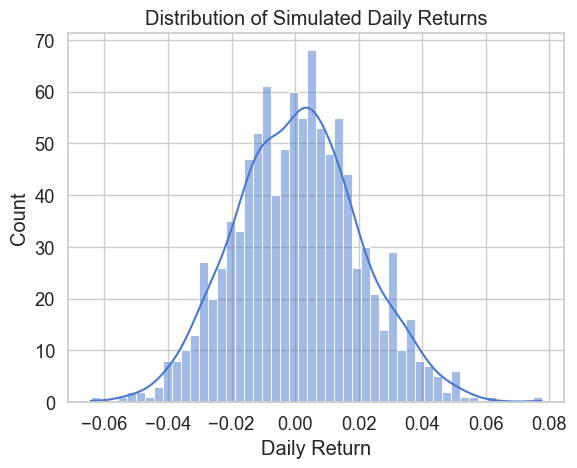

In [5]:
# Quick plot
sns.histplot(returns, bins=50, kde=True)
plt.title("Distribution of Simulated Daily Returns")
plt.xlabel("Daily Return")
plt.savefig("charts/Distribution_of_Simulated_Daily_Returns.png", dpi=300, bbox_inches="tight")
# plt.close()
plt.show()

In [6]:
# 📌 Step 2: Define Value-at-Risk (VaR)
# --------------------------------------------
# VaR answers: "What is the worst loss we might expect
# over a given time horizon with X% confidence?"

In [7]:
confidence_level = 0.95  # 95% VaR
alpha = 1 - confidence_level

In [8]:
# 🔹 Historical VaR (non-parametric)
var_hist = returns.quantile(alpha)

In [9]:
# 🔹 Parametric VaR (Variance–Covariance method)
mean = returns.mean()
std = returns.std()
from scipy.stats import norm
var_param = mean + std * norm.ppf(alpha)

In [10]:
# 🔹 Monte Carlo VaR
n_sim = 100000
sim_returns = np.random.normal(mean, std, n_sim)
var_mc = np.percentile(sim_returns, 100*alpha)

In [11]:
# 📊 Step 3: Visualize VaR Thresholds

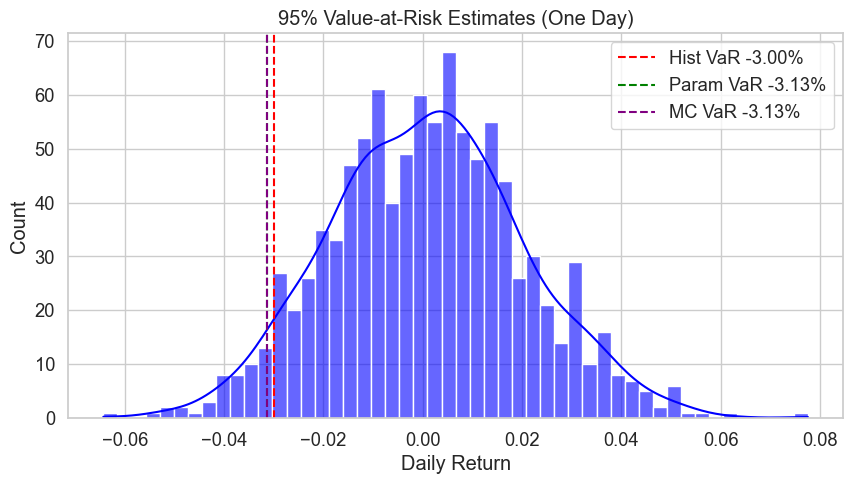

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(returns, bins=50, kde=True, color="blue", alpha=0.6)
plt.axvline(var_hist, color="red", linestyle="--", label=f"Hist VaR {var_hist:.2%}")
plt.axvline(var_param, color="green", linestyle="--", label=f"Param VaR {var_param:.2%}")
plt.axvline(var_mc, color="purple", linestyle="--", label=f"MC VaR {var_mc:.2%}")
plt.title("95% Value-at-Risk Estimates (One Day)")
plt.xlabel("Daily Return")

plt.legend()
plt.show()

In [16]:
# ✅ Wrap-Up
# --------------------------------------------
# 🔑 Key Takeaways:
# - **Historical VaR**: simple, data-driven, no distribution assumptions.
# - **Parametric VaR**: fast, assumes returns are normally distributed.
# - **Monte Carlo VaR**: flexible, can handle non-normal scenarios, but computationally heavier.
#
# 📌 In finance, VaR is a *risk metric*, not a prediction. It helps quantify
# potential downside risk, but should be complemented with other measures
# like Expected Shortfall (CVaR).